# 決定木

## 【問題1】不純度を求める関数

### ノード の ジニ不純度 を計算する関数を作成してください。ノード $t$ に対するジニ不純度 $I(t)$ は以下の数式で求まります。クラスが混じり合っているほどジニ不純度は高くなります。

$$
I(t)=1−∑^K_{i=1} P^2(Ci|t)=1−∑^K_{i=1}(\frac{N_{t,i}}{N_{t,all}})^2
$$

まずは簡単な例を作り、手計算と関数の結果を比較してください。

《例》

クラス1:サンプル数15, クラス2:サンプル数15 → ジニ不純度0.500  
クラス1:サンプル数15, クラス2:サンプル数15, クラス3:サンプル数15 → ジニ不純度0.667  
クラス1:サンプル数18, クラス2:サンプル数12 → ジニ不純度0.480  
クラス1:サンプル数30, クラス2:サンプル数0 → ジニ不純度0.000

In [1]:
def gini(X):
    # サンプルの総数
    sum = np.sum(X)
    # シグマの繰り返しを保管する変数
    sigma = 0
    # サンプルの数だけ繰り返す
    for i in range(X.shape[0]):
        # ジニ不純度を計算する式
        sigma += (X[i]/sum)**2
    ans = 1 - sigma
    # 求めた不純度を返す
    return ans

## 【問題2】情報利得を求める関数

### 次に、ノード間の 情報利得 を計算する関数を作成してください。問題1で作成したジニ不純度 $I(t)$ を計算する関数を呼び出して使います。情報利得$IG$は以下の数式で求まります。うまく分けられている時ほど情報利得は大きくなります。

### ここで分岐は2つのみであるため、分岐先を「左側のノード・右側のノード」と呼びます。

$$
IG(p)=I(p)−\frac{N_{left,all}}{N_{p,all}}I(left)− \frac{N_{right,all}}{N_{p,all}}I(right)
$$

まずは簡単な例を作り、手計算と関数の結果を比較してください。

《例》

左ノードクラス1:サンプル数10  
左ノードクラス2:サンプル数30  
右ノードクラス1:サンプル数20  
右ノードクラス2:サンプル数5  
→ 情報利得0.143

In [2]:
def Ig(X,y):
    # 親ノードの作成(X + y)
    Xy = X + y
    # 左右の子ノードの計算の前処理
    n_l = np.sum(X)/np.sum(Xy) # 左ノード
    n_r = np.sum(y)/np.sum(Xy) # 右ノード
    # 情報利得を計算するための式
    IG = gini(Xy) - (n_l*gini(X) + n_r*gini(y))

    return IG

## 【問題3】学習

### 空間の分割を行い、決定木のグラフを生成するコードを作成してください。今は深さ1の決定木なので、分割を1回だけ行います。ここでグラフを生成するとは、1回の分割の際の条件としてどの特徴量がいくつ以上の時とするかを求めるということです。


訓練データに対してすべての組み合わせの分割を行い、その中でノード間の情報利得が最大となる分割をそのノードの分割基準として記録します。


クラスが混ざらない不純度が0のノード、または指定された深さのノードが 葉ノード となります。葉ノードにはクラスを記録しておき、これを推定時に分類するクラスとします。クラスが混ざらない場合はそのままのクラスを記録し、混ざっている場合は多数決により決めます。

### 《組み合わせの取り方》

すべての組み合わせの取り方は、最も単純には各特徴量の値自体をしきい値にして分割を行う方法があります。片側の端は今回のスクラッチはこの方法で行なってください。


他には中間の値をしきい値にする方法もあり、scikit-learnではこの方法が用いられています。



### 《補足》

問題2の情報利得を計算する関数はこの問題3で利用する上では、親ノードの不純度 $I(p)$ は固定されるため、左右のノードの不純度の合計を計算するだけでも同じ結果が得られることになります。しかし、ここでは親ノードを考慮した情報利得を計算する実装を行なってください。

In [3]:
def fit(X):
    # 特徴量の閾値を探す
    Ig_maX = 0
    Ig_ind = 0
    for i in range(X.shape[0]-1):    
        print(Ig(X[i],X[i+1]))
        if Ig_maX < Ig(X[i],X[i+1]):
            Ig_maX = Ig(X[i],X[i+1])
            Ig_ind = i
            # 閾値（情報利得）が最大になるものを確定させる
    
    return Ig_ind

## 【問題4】推定

### 推定する仕組みを実装してください。ScratchDecesionTreeClassifierDepth1クラスの雛形に含まれるpredictメソッドに書き加えてください。

### 入力されたデータの値を学習した条件で判定していき、どの葉ノードに到達するかを見ます。葉ノードにはクラスが記録されているので、これが推定値となります。

In [4]:
def predict(X):         
    # 閾値(ここでは一つ)を超えたら 1、それ以外は0へとそれぞれに分割
    boX = np.array([])
    for i in range(X.shape[0]):
        Ig_data = X[i,0]
        if Ig_data < X[fit(X),0]:
            boX = np.append(boX,1)
        else:
            boX = np.append(boX,0)
    return boX    

## 【問題5】学習と推定

### 機械学習スクラッチ入門のSprintで用意したシンプルデータセット2の2値分類に対してスクラッチ実装の学習と推定を行なってください。
### scikit-learnによる実装と比べ、正しく動いているかを確認してください。
### AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [5]:
class ScratchDecesionTreeClassifierDepth1():
    """
    深さ1の決定木分類器のスクラッチ実装
    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
        
    def fit(self, X):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        # 特徴量の閾値を探す
        Ig_maX = 0
        Ig_ind = 0
        for i in range(X.shape[0]-1):    
            if Ig_maX < self.Ig(X[i],X[i+1]):
                Ig_maX = self.Ig(X[i],X[i+1])
                Ig_ind = i
        # 閾値（情報利得）が最大になるものを確定させる
        return Ig_ind
    
    """ジニ不純度を計算する関数"""
    def gini(self,X):
        # サンプルの総数
        sum = np.sum(X)
        # シグマの繰り返しを保管する変数
        sigma = 0
        # サンプルの数だけ繰り返す
        for i in range(X.shape[0]):
            # ジニ不純度を計算する式
            sigma += (X[i]/sum)**2
        ans = 1 - sigma
        # 求めた不純度を返す
        return ans
    
    """情報利得を計算する関数"""
    def Ig(self,X,y):
        # 親ノードの作成(X + y)
        Xy = X + y
        # 左右の子ノードの計算の前処理
        n_l = np.sum(X)/np.sum(Xy) # 左ノード
        n_r = np.sum(y)/np.sum(Xy) # 右ノード
        # 情報利得を計算するための式
        IG = gini(Xy) - (n_l*gini(X) + n_r*gini(y))

        return IG
    
    
        
    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        """
        boX = np.array([])
        for i in range(X.shape[0]):
            Ig_data = X[i,0]
            if Ig_data < X[self.fit(X),0]:
                boX = np.append(boX,1)
            else:
                boX = np.append(boX,0)
        return boX    
        

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import warnings                      #ワーニング関連のモジュール？
warnings.filterwarnings('ignore')    #ワーニングが消える？

In [7]:
X = np.array([
    [-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
    [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
    [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
    [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
    [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
    [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
    [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
    [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
    [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
    [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
    [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
    [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
    [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
    [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
    [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
    [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
    [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
    [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
    [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
    [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ],
])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [9]:
'''決定木モデルの作成'''

#モジュール読み込み、モデル構築
stdc = ScratchDecesionTreeClassifierDepth1()

#モデルの学習

stdc.fit(X_train)
y_pred = stdc.predict(X_test)
print(y_test)
print(y_pred)

[0 1 1 1 0 1 0 1 1 1]
[1. 1. 0. 1. 0. 1. 1. 1. 1. 1.]


In [10]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


print('confusion matrix = \n', confusion_matrix(y_test, y_pred))
print('accuracy = ', accuracy_score(y_test, y_pred))
print('precision = ', precision_score(y_test, y_pred))
print('recall = ', recall_score(y_test, y_pred))
print('f1 score = ', f1_score(y_test, y_pred))


confusion matrix = 
 [[1 2]
 [1 6]]
accuracy =  0.7
precision =  0.75
recall =  0.8571428571428571
f1 score =  0.7999999999999999


In [11]:
'''決定木モデルの作成'''

from sklearn.tree import DecisionTreeClassifier
stdc2 = DecisionTreeClassifier(max_depth = 1)

#モデルの学習

stdc2.fit(X_train, y_train)
y_pred2 = stdc2.predict(X_test)
print(y_test)
print(y_pred2)

[0 1 1 1 0 1 0 1 1 1]
[0 0 0 1 0 0 0 1 0 0]


In [12]:
print('confusion matrix = \n', confusion_matrix(y_test, y_pred2))
print('accuracy = ', accuracy_score(y_test, y_pred2))
print('precision = ', precision_score(y_test, y_pred2))
print('recall = ', recall_score(y_test, y_pred2))
print('f1 score = ', f1_score(y_test, y_pred2))

confusion matrix = 
 [[3 0]
 [5 2]]
accuracy =  0.5
precision =  1.0
recall =  0.2857142857142857
f1 score =  0.4444444444444445


## 【問題6】決定領域の可視化

### 決定領域を可視化してください。

In [13]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()



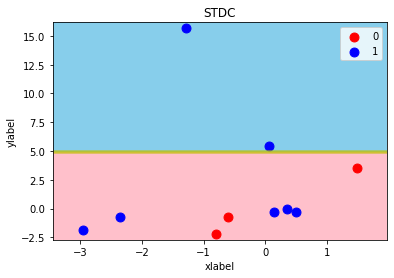

In [14]:
decision_region(X_test, y_test, model = stdc2, step=0.01, title='STDC', xlabel='xlabel', ylabel='ylabel', target_names=['0','1'])